至于 OpenCV 为什么不是人民群众喜闻乐见的 RGB，这是历史遗留问题，在 OpenCV 刚开始研发的年代，BGR 是相机设备厂商的主流表示方法，虽然后来 RGB 成了主流和默认，但是这个底层的顺序却保留下来了，事实上 Windows 下的最常见格式之一 bmp，底层字节的存储顺序还是 BGR。OpenCV 的这个特殊之处还是需要注意的，比如在 Python 中，图像都是用 numpy 的 array 表示，但是同样的 array 在 OpenCV 中的显示效果和 matplotlib 中的显示效果就会不一样。下面的简单代码就可以生成两种表示方式：

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 图6-1中的矩阵
img = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
    [[255, 255, 255], [128, 128, 128], [0, 0, 0]],
], dtype=np.uint8)

# 用matplotlib存储
plt.imsave('img_pyplot.jpg', img)

# 用OpenCV存储
cv2.imwrite('img_cv2.jpg', img)

True

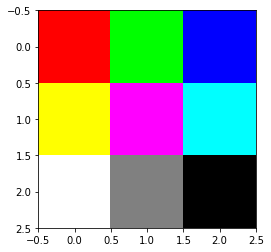

In [6]:
img = plt.imread('img_pyplot.jpg')
plt.imshow(img)

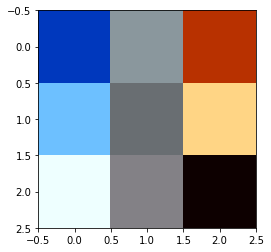

In [7]:
img = plt.imread('img_cv2.jpg')
plt.imshow(img)

# 基本图像处理

## 存取图像

读图像用 `cv2.imread()`，可以按照不同模式读取，一般最常用到的是读取单通道灰度图，或者直接默认读取多通道。存图像用cv2.imwrite()，注意存的时候是没有单通道这一说的，根据保存文件名的后缀和当前的array维度，OpenCV自动判断存的通道，另外压缩格式还可以指定存储质量，来看代码例子：

(213, 255, 3)


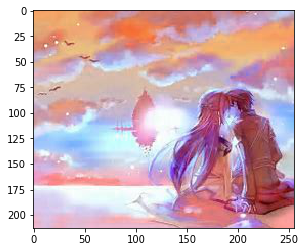

In [8]:
import cv2
import matplotlib.pylab as plt

image_name = 'E:/Images/thO3CXS0S3.jpg'

# 读取一张图像
color_img = cv2.imread(image_name)
print(color_img.shape)
plt.imshow(color_img)

(213, 255, 3)


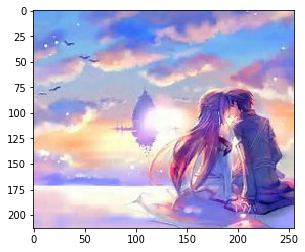

In [9]:
img = plt.imread(image_name)
print(img.shape)
plt.imshow(img)

In [10]:
# 直接读取单通道
gray_img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
print(gray_img.shape)

(213, 255)


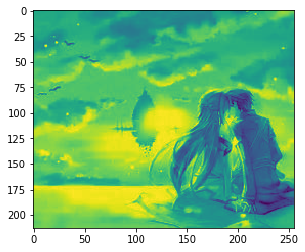

In [11]:
plt.imshow(gray_img)

(213, 255, 3)


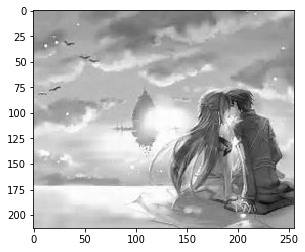

In [12]:
# 把单通道图片保存后，再读取，仍然是 3 通道，相当于把单通道值复制到 3 个通道保存
cv2.imwrite('test_grayscale.jpg', gray_img)
reload_grayscale = cv2.imread('test_grayscale.jpg')
print(reload_grayscale.shape)
plt.imshow(reload_grayscale)

In [13]:
# cv2.IMWRITE_JPEG_QUALITY指定 jpg 质量，范围 0 到 100，默认95，越高画质越好，文件越大
cv2.imwrite('test_imwrite1.jpg', color_img, (cv2.IMWRITE_JPEG_QUALITY, 80))

# cv2.IMWRITE_PNG_COMPRESSION指定 png 质量，范围 0 到 9，默认 3，越高文件越小，画质越差
cv2.imwrite('test_imwrite2.png', color_img, (cv2.IMWRITE_PNG_COMPRESSION, 5))

True

# 缩放，裁剪，旋转和补边
缩放通过 `cv2.resize()` 实现，裁剪则是利用 array 自身的下标截取实现，此外 OpenCV 还可以给图像补边，这样能对一幅图像的形状和感兴趣区域实现各种操作。下面的例子中读取一幅图片，并执行一些基础的操作：

## 缩放

(100, 120, 3)


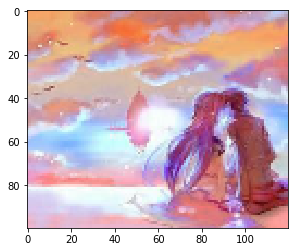

In [14]:
import cv2

# 读取照片
img = cv2.imread(image_name)

# 缩放成 120x100 的方形图像
img1 = cv2.resize(img, (120, 100))
print(img1.shape)
plt.imshow(img1)

(106, 128, 3)


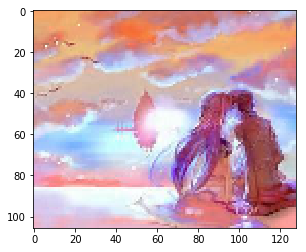

In [15]:
# 不直接指定缩放后大小，通过 fx 和 fy 指定缩放比例，0.5则长宽都为原来一半
# 类似 img1 = cv2.resize(img, (120, 100))，注意指定大小的格式是(宽度,高度)
# 插值方法默认是cv2.INTER_LINEAR，这里指定为最近邻插值
img2 = cv2.resize(img, (0, 0), fx=0.5, fy=0.5, 
                              interpolation=cv2.INTER_NEAREST)
print(img2.shape)
plt.imshow(img2)

## 转置

(120, 100, 3)


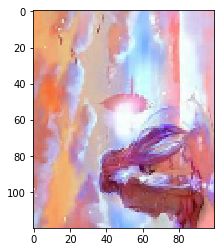

In [16]:
a = img1.transpose((1, 0, 2)) # 按指定轴进行转置
print(a.shape)
plt.imshow(a)

## 旋转

In [17]:
import numpy as np

(120, 100, 3)


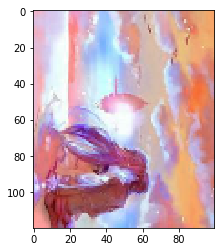

In [18]:
a = np.rot90(img1, 3)  # 逆时针旋转 3 个 ∟（直角）
print(a.shape)
plt.imshow(a)

In [19]:
a.flatten()  # 将数组展开为一维向量

array([240, 183, 204, ..., 186, 195, 213], dtype=uint8)

In [20]:
a.ravel()

array([240, 183, 204, ..., 186, 195, 213], dtype=uint8)

In [21]:
np.save('a.npy', a)  # 保存到本地磁盘
np.save('a1', a)  # 保存到本地磁盘
a1 = np.load('a.npy')  # 从文件读取

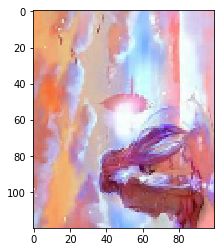

In [22]:
lr_a = np.fliplr(a)  # 左右翻转
plt.imshow(lr_a)

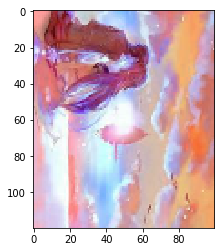

In [23]:
ud_a = np.flipud(a)  # 上下翻转
plt.imshow(ud_a)

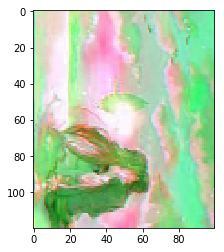

In [24]:
roll_a = np.roll(a, 1)  # 按照一维顺序滚动位移 1
plt.imshow(roll_a)

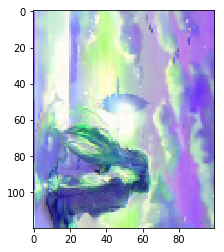

In [25]:
roll_a = np.roll(a, 2)  # 按照 1 维顺序滚动位移 2
plt.imshow(roll_a)

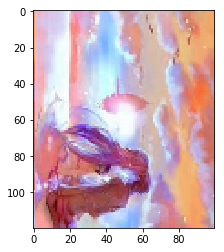

In [26]:
roll_a = np.roll(a, 3)  # 按照 1 维顺序滚动位移 3
plt.imshow(roll_a)

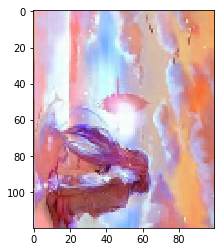

In [27]:
roll_a = np.roll(a, 1, axis= 1)  # 按照指定轴滚动位移
plt.imshow(roll_a)

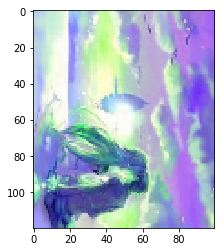

In [28]:
roll_a = np.roll(a, 2, axis= 2)  # 按照指定轴滚动位移
plt.imshow(roll_a)

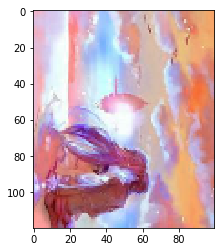

In [29]:
roll = np.rollaxis(a, 0, 1)
plt.imshow(roll)

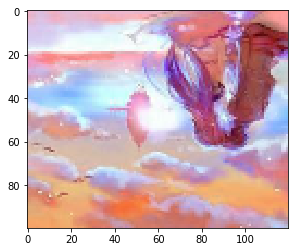

In [30]:
roll = np.rollaxis(a, 0, 2)
plt.imshow(roll)

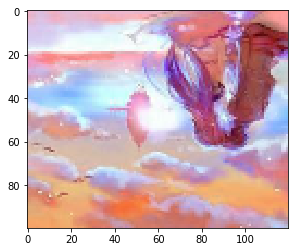

In [31]:
roll = np.rollaxis(a, 1, 0)
plt.imshow(roll)

```py
np.rollaxis(a, axis, start=0)
```

In [32]:
a = np.ones((3,4,5,6))
np.rollaxis(a, 3, 1).shape

(3, 6, 4, 5)

In [33]:
np.rollaxis(a, 2).shape

(5, 3, 4, 6)

In [34]:
 np.rollaxis(a, 1, 4).shape

(3, 5, 6, 4)

## 补边

(100, 120, 3)
(200, 120, 3)


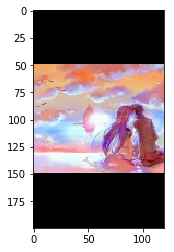

In [35]:
# 在 img1 的基础上，上下各贴 50 像素的黑边，生成图像
img3 = cv2.copyMakeBorder(img1, 50, 50, 0, 0, 
                          cv2.BORDER_CONSTANT, 
                          value=(0, 0, 0))
print(img1.shape)
print(img3.shape)
plt.imshow(img3)

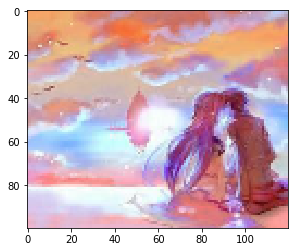

In [36]:
plt.imshow(img1)

(54, 60, 3)


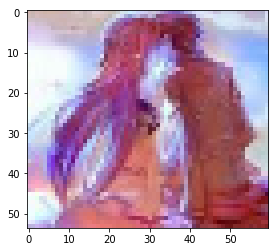

In [37]:
# 对照片中 人 的部分进行剪裁
patch_people = img1[36:-10, 58:-2]
plt.imshow(patch_people)
print(patch_people.shape)

In [38]:
cv2.imwrite('cropped_people.jpg', patch_people)

True

# 色调，明暗，直方图和 Gamma 曲线

除了区域，图像本身的属性操作也非常多，比如可以通过 HSV 空间对色调和明暗进行调节。HSV 空间是由美国的图形学专家 A. R. Smith 提出的一种颜色空间，HSV分别是色调（Hue），饱和度（Saturation）和明度（Value）。在 HSV 空间中进行调节就避免了直接在 RGB 空间中调节时还需要考虑三个通道的相关性。OpenCV中H的取值是$[0, 180)$，其他两个通道的取值都是$[0, 256)$，下面例子接着上面例子代码，通过 HSV 空间对图像进行调整：

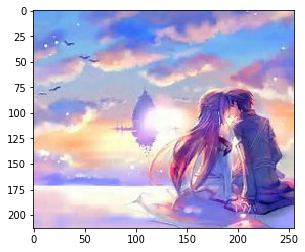

In [78]:
plt.imshow(plt.imread(image_name))

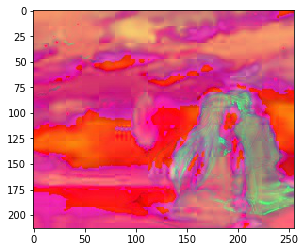

In [79]:
img = cv2.imread(image_name)
# 通过cv2.cvtColor把图像从 BGR 转换到 HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imwrite('hsv_img.jpg', img_hsv)
plt.imshow(plt.imread('hsv_img.jpg'))

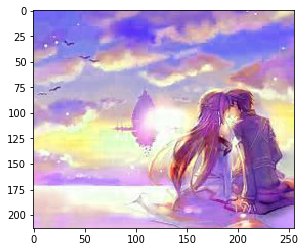

In [77]:
# H 空间中，绿色比黄色的值高一点，所以给每个像素 +15，黄色的就会变绿
turn_green_hsv = img_hsv.copy()
turn_green_hsv[:, :, 0] = (turn_green_hsv[:, :, 0]+15) % 180
turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('turn_green.jpg', turn_green_img)
plt.imshow(plt.imread('turn_green.jpg'))

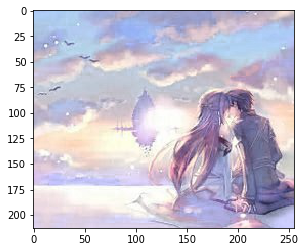

In [81]:
# 减小饱和度会让图像损失鲜艳，变得更灰
colorless_hsv = img_hsv.copy()
colorless_hsv[:, :, 1] = 0.5 * colorless_hsv[:, :, 1]
colorless_img = cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('colorless.jpg', colorless_img)
plt.imshow(plt.imread('colorless.jpg'))

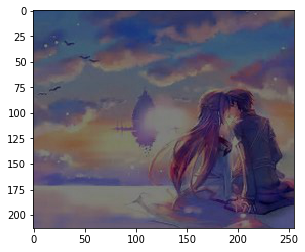

In [82]:
# 减小明度为原来一半
darker_hsv = img_hsv.copy()
darker_hsv[:, :, 2] = 0.5 * darker_hsv[:, :, 2]
darker_img = cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('darker.jpg', darker_img)
plt.imshow(plt.imread('darker.jpg'))

无论是 HSV 还是 RGB，我们都较难一眼就对像素中值的分布有细致的了解，这时候就需要直方图。如果直方图中的成分过于靠近 $0$ 或者 $255$，可能就出现了暗部细节不足或者亮部细节丢失的情况。这个时候，一个常用方法是考虑用 Gamma 变换来提升暗部细节。Gamma 变换是矫正相机直接成像和人眼感受图像差别的一种常用手段，简单来说就是通过非线性变换让图像从对曝光强度的线性响应变得更接近人眼感受到的响应。具体的定义和实现，还是接着上面代码中读取的图片，执行计算直方图和 Gamma 变换的代码如下：

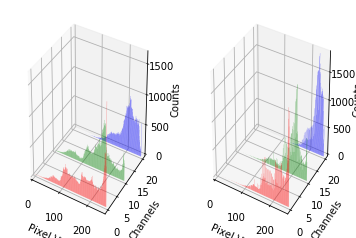

In [130]:
import numpy as np

# 分通道计算每个通道的直方图
hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])

# 定义Gamma矫正的函数
def gamma_trans(img, gamma):
    # 具体做法是先归一化到 1，然后 gamma 作为指数值求出新的像素值再还原
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)

# 执行Gamma矫正，小于1的值让暗部细节大量提升，同时亮部细节少量提升
img_corrected = gamma_trans(img, 0.5)
cv2.imwrite('gamma_corrected.jpg', img_corrected)

# 分通道计算Gamma矫正后的直方图
hist_b_corrected = cv2.calcHist([img_corrected], [0], None, [256], [0, 256])
hist_g_corrected = cv2.calcHist([img_corrected], [1], None, [256], [0, 256])
hist_r_corrected = cv2.calcHist([img_corrected], [2], None, [256], [0, 256])

# 将直方图进行可视化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pix_hists = [
    [hist_b, hist_g, hist_r],
    [hist_b_corrected, hist_g_corrected, hist_r_corrected]
]

fig = plt.figure()

pix_vals = np.arange(256).reshape(256, 1)
for sub_plt, pix_hist in zip([121, 122], pix_hists):
    ax = fig.add_subplot(sub_plt, projection='3d')
    for c, z, channel_hist in zip(['b', 'g', 'r'], [20, 10, 0], pix_hist):
        cs = [c] * 256
        ax.bar(pix_vals, channel_hist, zs=z, zdir='y', color=cs, alpha=0.618, lw=0)

    ax.set_xlabel('Pixel Values')
    ax.set_xlim([0, 256])
    ax.set_ylabel('Channels')
    ax.set_zlabel('Counts')
plt.show()

可以看到，Gamma 变换后的暗部细节比起原图清楚了很多，并且从直方图来看，像素值也从集中在 $0$ 附近变得散开了一些。

# 图像的仿射变换

图像的仿射变换涉及到图像的形状位置角度的变化，是深度学习预处理中常到的功能，在此简单回顾一下。仿射变换具体到图像中的应用，主要是对图像的缩放，旋转，剪切，翻转和平移的组合。在 OpenCV 中，仿射变换的矩阵是一个 $2 \times 3$ 的矩阵，其中左边的 $2 \times 2$ 子矩阵是线性变换矩阵，右边的 $2 \times 1$ 的两项是平移。

需要注意的是，对于图像而言，宽度方向是 $x$，高度方向是 $y$，坐标的顺序和图像像素对应下标一致。所以原点的位置不是左下角而是右上角，$y$ 的方向也不是向上，而是向下。在 OpenCV 中实现仿射变换是通过仿射变换矩阵和 `cv2.warpAffine()` 这个函数，还是通过代码来理解一下，例子中图片的分辨率为 $600\times400$：

In [132]:
import cv2
import numpy as np

img = cv2.imread('E:/Images/5a2e206693e4d.png')

# 沿着横纵轴放大 1.6 倍，然后平移(-150,-240)，最后沿原图大小截取，等效于裁剪并放大
M_crop_img = np.array([
    [1.6, 0, -150],
    [0, 1.6, -240]
], dtype=np.float32)

img1 = cv2.warpAffine(img, M_crop_img, (400, 600))
cv2.imwrite('lanka.jpg', img1)

# x轴的剪切变换，角度15°
theta = 15 * np.pi / 180
M_shear = np.array([
    [1, np.tan(theta), 0],
    [0, 1, 0]
], dtype=np.float32)

img_sheared = cv2.warpAffine(img, M_shear, (400, 600))
cv2.imwrite('lanka_safari_sheared.jpg', img_sheared)

# 顺时针旋转，角度15°
M_rotate = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)

img_rotated = cv2.warpAffine(img, M_rotate, (400, 600))
cv2.imwrite('lanka_safari_rotated.jpg', img_rotated)

# 某种变换，具体旋转+缩放+旋转组合可以通过SVD分解理解
M = np.array([
    [1, 1.5, -400],
    [0.5, 2, -100]
], dtype=np.float32)

img_transformed = cv2.warpAffine(img, M, (400, 600))
cv2.imwrite('lanka_safari_transformed.jpg', img_transformed)

True

# 基本绘图

OpenCV 提供了各种绘图的函数，可以在画面上绘制线段，圆，矩形和多边形等，还可以在图像上指定位置打印文字，比如下面例子： 

In [135]:
import numpy as np
import cv2

# 定义一块宽 600，高 400 的画布，初始化为白色
canvas = np.zeros((400, 600, 3), dtype=np.uint8) + 255

# 画一条纵向的正中央的黑色分界线
cv2.line(canvas, (300, 0), (300, 399), (0, 0, 0), 2)

# 画一条右半部份画面以150为界的横向分界线
cv2.line(canvas, (300, 149), (599, 149), (0, 0, 0), 2)

# 左半部分的右下角画个红色的圆
cv2.circle(canvas, (200, 300), 75, (0, 0, 255), 5)

# 左半部分的左下角画个蓝色的矩形
cv2.rectangle(canvas, (20, 240), (100, 360), (255, 0, 0), thickness=3)

# 定义两个三角形，并执行内部绿色填充
triangles = np.array([
    [(200, 240), (145, 333), (255, 333)],
    [(60, 180), (20, 237), (100, 237)]])
cv2.fillPoly(canvas, triangles, (0, 255, 0))

# 画一个黄色五角星
# 第一步通过旋转角度的办法求出五个顶点
phi = 4 * np.pi / 5
rotations = [[[np.cos(i * phi), -np.sin(i * phi)], [i * np.sin(phi), np.cos(i * phi)]] for i in range(1, 5)]
pentagram = np.array([[[[0, -1]] + [np.dot(m, (0, -1)) for m in rotations]]], dtype=np.float)

# 定义缩放倍数和平移向量把五角星画在左半部分画面的上方
pentagram = np.round(pentagram * 80 + np.array([160, 120])).astype(np.int)

# 将5个顶点作为多边形顶点连线，得到五角星
cv2.polylines(canvas, pentagram, True, (0, 255, 255), 9)

# 按像素为间隔从左至右在画面右半部份的上方画出HSV空间的色调连续变化
for x in range(302, 600):
    color_pixel = np.array([[[round(180*float(x-302)/298), 255, 255]]], dtype=np.uint8)
    line_color = [int(c) for c in cv2.cvtColor(color_pixel, cv2.COLOR_HSV2BGR)[0][0]]
    cv2.line(canvas, (x, 0), (x, 147), line_color)

# 如果定义圆的线宽大于半斤，则等效于画圆点，随机在画面右下角的框内生成坐标
np.random.seed(42)
n_pts = 30
pts_x = np.random.randint(310, 590, n_pts)
pts_y = np.random.randint(160, 390, n_pts)
pts = zip(pts_x, pts_y)

# 画出每个点，颜色随机
for pt in pts:
    pt_color = [int(c) for c in np.random.randint(0, 255, 3)]
    cv2.circle(canvas, pt, 3, pt_color, 5)

# 在左半部分最上方打印文字
cv2.putText(canvas,
            'Python-OpenCV Drawing Example',
            (5, 15),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 0, 0),
            1)

cv2.imshow('Example of basic drawing functions', canvas)
cv2.waitKey()

-1

# 视频功能

视频中最常用的就是从视频设备采集图片或者视频，或者读取视频文件并从中采样。所以比较重要的也是两个模块，一个是 `VideoCapture`，用于获取相机设备并捕获图像和视频，或是从文件中捕获。还有一个 `VideoWriter`，用于生成视频。还是来看例子理解这两个功能的用法，首先是一个制作延时摄影视频的小例子：

In [ ]:
import cv2
import time

interval = 60       	# 捕获图像的间隔，单位：秒
num_frames = 500    	# 捕获图像的总帧数
out_fps = 24        	# 输出文件的帧率

# VideoCapture(0)表示打开默认的相机
cap = cv2.VideoCapture(0)

# 获取捕获的分辨率
size =(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
       int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
       
# 设置要保存视频的编码，分辨率和帧率
video = cv2.VideoWriter(
    "time_lapse.avi", 
    cv2.VideoWriter_fourcc('M','P','4','2'), 
    out_fps, 
    size
)

# 对于一些低画质的摄像头，前面的帧可能不稳定，略过
for i in range(42):
    cap.read()

# 开始捕获，通过read()函数获取捕获的帧
try:
    for i in range(num_frames):
        _, frame = cap.read()
        video.write(frame)

        # 如果希望把每一帧也存成文件，比如制作GIF，则取消下面的注释
        # filename = '{:0>6d}.png'.format(i)
        # cv2.imwrite(filename, frame)

        print('Frame {} is captured.'.format(i))
        time.sleep(interval)
except KeyboardInterrupt:
    # 提前停止捕获
    print('Stopped! {}/{} frames captured!'.format(i, num_frames))

# 释放资源并写入视频文件
video.release()
cap.release()

Frame 0 is captured.


这个例子实现了延时摄影的功能，把程序打开并将摄像头对准一些缓慢变化的画面，比如桌上缓慢蒸发的水，或者正在生长的小草，就能制作出有趣的延时摄影作品。比如下面这个链接中的图片就是用这段程序生成的：

![](http://images.cnitblog.com/blog2015/609274/201503/251904209276278.gif)

程序的结构非常清晰简单，注释里也写清楚了每一步，所以流程就不解释了。需要提一下的有两点：一个是 `VideoWriter` 中的一个函数`cv2.VideoWriter_fourcc()`。这个函数指定了视频编码的格式，比如例子中用的是 MP42，也就是 MPEG-4，更多编码方式可以在下面的地址查询：
[Video Codecs by FOURCC](http://www.fourcc.org/codecs.php)

还有一个是 `KeyboardInterrupt`，这是一个常用的异常，用来获取用户 `Ctrl+C` 的中止，捕获这个异常后直接结束循环并释放 `VideoCapture` 和 `VideoWriter` 的资源，使已经捕获好的部分视频可以顺利生成。

从视频中截取帧也是处理视频时常见的任务，下面代码实现的是遍历一个指定文件夹下的所有视频并按照指定的间隔进行截屏并保存： 
```py
import cv2
import os
import sys

# 第一个输入参数是包含视频片段的路径
input_path = sys.argv[1]

# 第二个输入参数是设定每隔多少帧截取一帧
frame_interval = int(sys.argv[2])

# 列出文件夹下所有的视频文件
filenames = os.listdir(input_path)

# 获取文件夹名称
video_prefix = input_path.split(os.sep)[-1]

# 建立一个新的文件夹，名称为原文件夹名称后加上_frames
frame_path = '{}_frames'.format(input_path)
if not os.path.exists(frame_path):
    os.mkdir(frame_path)

# 初始化一个VideoCapture对象
cap = cv2.VideoCapture()

# 遍历所有文件
for filename in filenames:
    filepath = os.sep.join([input_path, filename])
    
    # VideoCapture::open函数可以从文件获取视频
    cap.open(filepath)
    
    # 获取视频帧数
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # 同样为了避免视频头几帧质量低下，黑屏或者无关等
    for i in range(42):
        cap.read()
    
    for i in range(n_frames):
        ret, frame = cap.read()
        
        # 每隔frame_interval帧进行一次截屏操作
        if i % frame_interval == 0:
            imagename = '{}_{}_{:0>6d}.jpg'.format(video_prefix, filename.split('.')[0], i)
            imagepath = os.sep.join([frame_path, imagename])
            print('exported {}!'.format(imagepath))
            cv2.imwrite(imagepath, frame)

# 执行结束释放资源
cap.release()
```